
## Begin by loading up the data and previewing it

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import to_datetime
from fbprophet import Prophet
from pandas import DataFrame
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
data = pd.read_csv('/content/document.csv')
data.drop('Competitors Sales',axis=1,inplace=True)

In [76]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          144 non-null    object 
 1   Product Sales  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


,Month,Product Sales
0,Jan-17,5199714.768
1,Feb-17,5008533.574
2,Mar-17,5445625.334
3,Apr-17,4983083.852
4,May-17,5840579.541


Precrocessing of Data is done in Excel itself

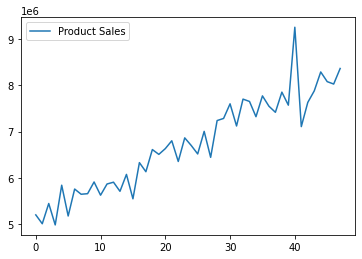

In [77]:
df = data[['Month','Product Sales']]
df.plot()
pyplot.show()

## Preprocessing data according to Fbprophet Algorithm

In [78]:
# df field with dates
# y sales of product
# convert month field in dates format
dates = []
for j in range(0,4):
  k = 2017+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    dates.append([date])
dates = DataFrame(dates)
dates.columns = ['ds']
dates['ds']= to_datetime(dates['ds'])

In [79]:
df = data.iloc[0:48,:]
# df.drop('Competitors Sales',axis=1,inplace=True)
df.columns = ['ds', 'y']
df['ds'] = dates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


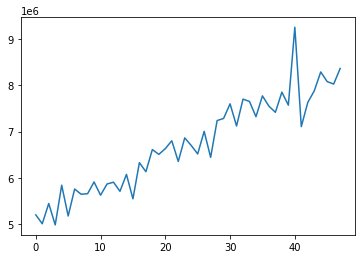

In [80]:
df.y.plot()

In [81]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
future = []
for j in range(0,4):
  k = 2021+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds']) # creating future dates

In [83]:
forecast = model.predict(future)

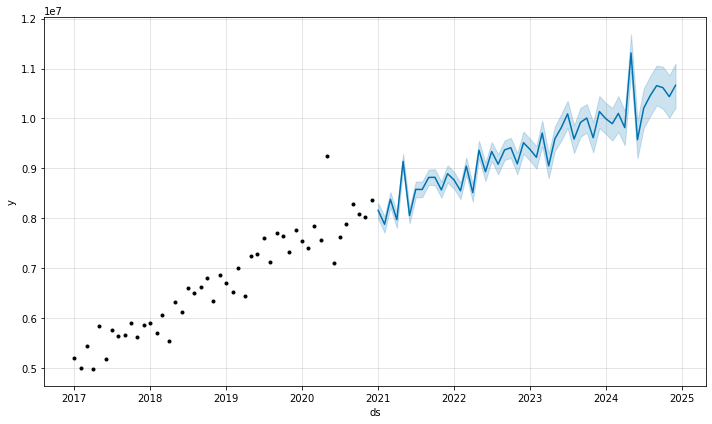

In [84]:
fig1 = model.plot(forecast)  #plot forecast

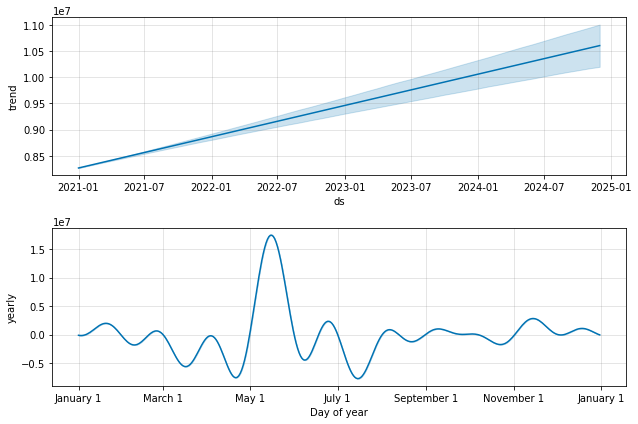

In [85]:
fig2 = model.plot_components(forecast) 
# monthly and yearly forecast

In [86]:
foreacst_21_24 = forecast['yhat']

## Forecasting Comparator

In [87]:
data = pd.read_csv('/content/document.csv')
data.drop('Product Sales',axis=1,inplace=True)
data.head()

,Month,Competitors Sales
0,Jan-17,"684,331.20"
1,Feb-17,"651,685.01"
2,Mar-17,"649,771.26"
3,Apr-17,"676,788.80"
4,May-17,"683,271.06"


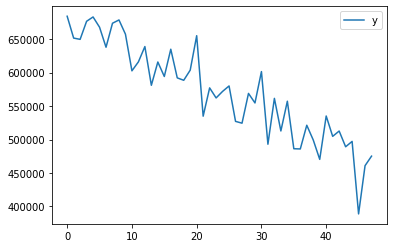

In [88]:
df = data[['Month']]
df = df.iloc[0:48,:]
test = []
temp = data['Competitors Sales']
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
for i in range(0,48):
  test.append(locale.atof(temp[i]))

df['y'] = test
df.plot()
pyplot.show()

In [89]:
# df field with dates
# y sales of product
# convert month field in dates format
dates = []
for j in range(0,4):
  k = 2017+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    dates.append([date])
dates = DataFrame(dates)
dates.columns = ['ds']
dates['ds']= to_datetime(dates['ds'])
# df.drop('Competitors Sales',axis=1,inplace=True)

In [90]:
# df.drop('Competitors Sales',axis=1,inplace=True)
df.columns = ['ds', 'y']
df['ds'] = dates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


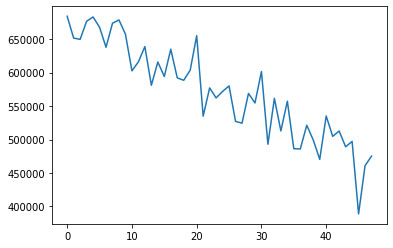

In [91]:
df.y.plot()

In [92]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
future = []
for j in range(0,4):
  k = 2021+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds']) # creating future dates

In [94]:
forecast = model.predict(future)

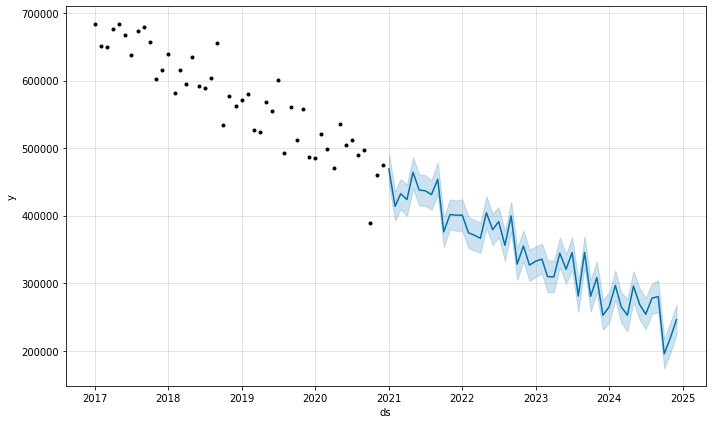

In [95]:
fig1 = model.plot(forecast)  #plot forecast

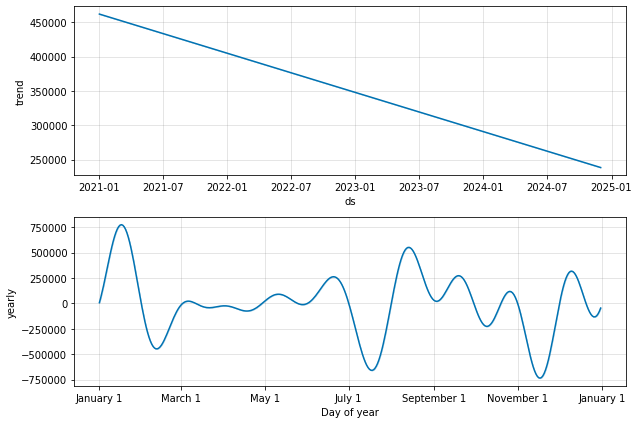

In [96]:
fig2 = model.plot_components(forecast) 
# monthly and yearly forecast

In [97]:
foreacst_comparator_21_24 = forecast['yhat']

In [98]:
foreacst_comparator_21_24

0     469331.139743
1     413862.596578
2     432473.233177
3     423828.380326
4     464315.688168
5     437925.645557
6     436907.202866
7     431259.953852
8     453927.182218
9     376038.796400
10    401713.064695
11    400750.253987
12    400787.204611
13    374609.748200
14    371264.794974
15    366589.489243
16    404397.466387
17    379225.035730
18    391203.563859
19    356179.023150
20    399615.779848
21    328339.075532
22    355196.522986
23    326760.957451
24    332669.396477
25    335571.756279
26    309853.880001
27    309307.802272
28    344468.434574
29    320655.014548
30    345303.522686
31    281065.049366
32    345646.049464
33    280720.511336
34    308283.209476
35    252538.439674
36    264990.520086
37    296731.599516
38    265114.393146
39    252658.797844
40    295855.115969
41    268392.307576
42    254057.661002
43    277926.741240
44    280216.896058
45    195469.782537
46    219479.370882
47    246121.674327
Name: yhat, dtype: float64

## Forecasting with Comparator

In [153]:
data = pd.read_csv('/content/document.csv')
data.drop('Competitors Sales',axis=1,inplace=True)
data.head()

,Month,Product Sales
0,Jan-17,5199714.768
1,Feb-17,5008533.574
2,Mar-17,5445625.334
3,Apr-17,4983083.852
4,May-17,5840579.541


In [154]:
df = data.iloc[0:48,:]
# df.drop('Competitors Sales',axis=1,inplace=True)
df.columns = ['ds', 'y']
df['ds'] = dates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [155]:
product = df['y']
comparator = foreacst_comparator_21_24
value = max(product)
percent_data = []
for i in range(0,48):
  a = float(((product[i]/value)*100))
  b = ((comparator[i])/value)*100
  percent_data.append(a-b)

In [156]:
p = []
for i in range(0,48):
  p.append((percent_data[i]*value)/200)
df['y'] = p
# df.drop('y2',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


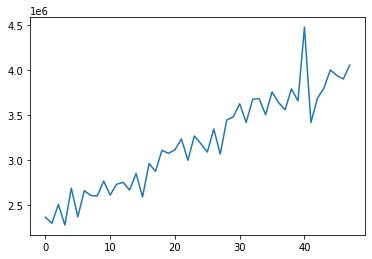

In [157]:
df.y.plot()

In [158]:
model = Prophet()
model.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [159]:
future = []
for j in range(0,4):
  k = 2024+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds']) # creating future dates

In [160]:
forecast = model.predict(future)

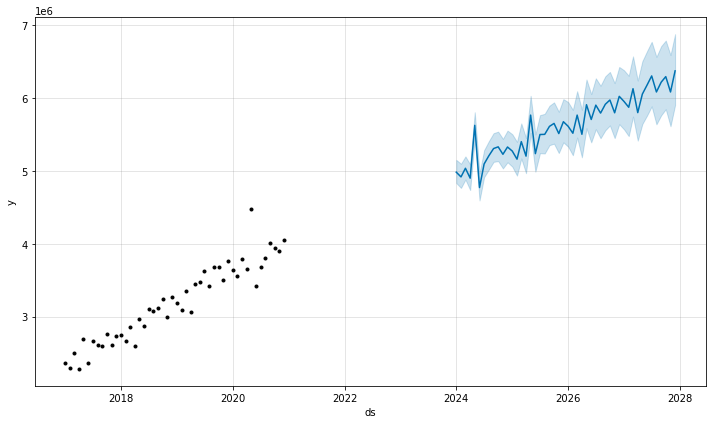

In [161]:
fig1 = model.plot(forecast)  #plot forecast

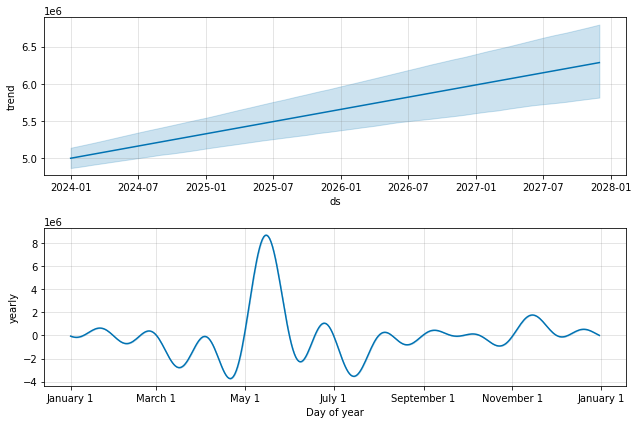

In [162]:
fig2 = model.plot_components(forecast) 
# monthly and yearly forecast

In [163]:
forecast_24_28 = forecast['yhat']

In [164]:
values = []
for i in foreacst_21_24:
  values.append(i)

for i in forecast_24_28:
  values.append(i)

In [165]:
future = []
for j in range(0,8):
  k = 2021+j
  for i in range(1, 13):
    date = str(k)+'-%02d' %i
    future.append([date])
future = DataFrame(future)
future.columns = ['Date']
future['Date']= to_datetime(future['Date']) # creating future dates

In [166]:
future['y'] = values

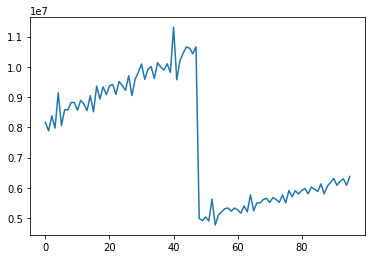

In [167]:
future.y.plot()

In [168]:
future.to_csv('/content/s/forecast.csv')